In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm
import concurrent.futures

print(os.listdir())
import matplotlib.pyplot as plt

['social.txt', 'graph_example625.jpg', 'graph_example425.jpg', 'social_A.txt', 'youtube.ipynb', 'social_graph_indicator.txt', 'graph_example525.jpg', 'shaded.png', 'graph_example450.jpg', 'graph_example400.jpg', 'graph_example350.jpg', 'graph_example700.jpg', 'graph_example175.jpg', 'sampling_test.ipynb', 'graph_example225.jpg', 'graph_example75.jpg', 'graph_example650.jpg', 'graph_example550.jpg', 'graph_example600.jpg', 'graph_example50.jpg', 'graph_example725.jpg', 'graph_example300.jpg', 'social_to_adjacency.ipynb', 'graph_example0.jpg', 'graph_example125.jpg', 'graph_example150.jpg', 'graph_example750.jpg', '.ipynb_checkpoints', 'graph_example575.jpg', 'graph_example275.jpg', 'social_node_labels.txt', 'graph_example675.jpg', 'graph_example25.jpg', 'graph_example100.jpg', 'social_graph_labels.txt', 'musae_facebook_edges.csv', 'social_to_ds.ipynb', 'graph_example475.jpg', 'large_twitch_edges.csv', 'graph_example375.jpg', 'graph_example200.jpg', 'graph_example250.jpg', 'graph_example

In [2]:
parent_directory = os.path.dirname(os.getcwd())
data_directory   = os.path.join(parent_directory, "raw_datasets/youtube")

In [3]:
filename = "/home/alex/Projects/GRAN_social/raw_datasets/youtube/com-youtube.ungraph.txt"
dataset_path = os.path.join(data_directory, filename)

social_data = pd.read_csv(dataset_path, delimiter = "\t", skiprows = 3)
print(social_data.shape)
# np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")
social_data.head()

(2987624, 2)


,# FromNodeId,ToNodeId
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [20]:
target_filename = "/home/alex/Projects/GRAN_social/raw_datasets/youtube/com-youtube.all.cmty.txt"
target_path     = os.path.join(data_directory, target_filename)

node_to_com = {}

with open(target_path, "r") as f:
    lines = f.readlines()
    for community, l in enumerate(lines):
        nodes = l[:-2].split("\t")
        
        nodes = [int(n) for n in nodes]
        for n in nodes:
            node_to_com[n] = community
            
# print(node_to_com)

In [4]:
# target_filename = "musae_facebook_target.csv"
# target_path     = os.path.join(data_directory, target_filename)

# target_data = pd.read_csv(target_path, delimiter = ",", skiprows = 0)
# target_data.head()

# node_ids = target_data["id"].tolist()
# page_types = target_data["page_type"].tolist()


# unique_page_types = np.unique(page_types)
# int_labels = [i for i in range(unique_page_types.shape[0])]

# conv_dict = {}
# for i, page_type in enumerate(list(unique_page_types)):
#     conv_dict[page_type] = int_labels[i]
    
# print(conv_dict)

# int_labels = {}

# for i, item in enumerate(page_types):
#     int_labels[str(i)] = conv_dict[item]

{'company': 0, 'government': 1, 'politician': 2, 'tvshow': 3}


In [5]:
# import json

# attribute_filename = "musae_facebook_features.json"
# attribute_path     = os.path.join(data_directory, attribute_filename)

# with open(attribute_path, "r") as f:
#     attribute_data = json.load(f)
    
# attribute_shape = len(attribute_data["15"])

# keys = list(attribute_data.keys())
# lengths = [len(attribute_data[l]) for l in keys]
# tokens = []
# for k in keys:
#     tokens += attribute_data[k]
# print(np.unique(lengths))
# print(np.min(tokens))
# print(np.max(tokens))

# def feature_to_token(feature, min_t = 0, max_t = 4800):
#     out_vector = np.zeros(max_t)
#     out_vector[feature] = 1
#     return out_vector

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 19 20 21 22 23 24 25 26 27 28 29
 30 31]
0
4713


(22470, 4800)
UMAP(n_components=20, n_jobs=6, n_neighbors=100, verbose=1)
Mon Jul  4 16:48:34 2022 Construct fuzzy simplicial set
Mon Jul  4 16:48:34 2022 Finding Nearest Neighbors
Mon Jul  4 16:48:34 2022 Building RP forest with 12 trees
Mon Jul  4 16:48:36 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Mon Jul  4 16:48:59 2022 Finished Nearest Neighbor Search
Mon Jul  4 16:49:00 2022 Construct embedding


Epochs completed: 100%| █████████████████████████████████████████████████████████████████████████████████ 200/200 [00:11]


Mon Jul  4 16:49:14 2022 Finished embedding


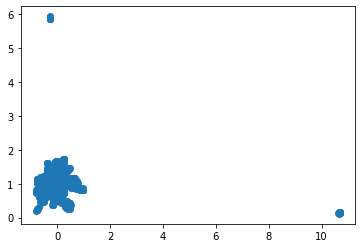

In [58]:
# from umap import UMAP
# embedder = UMAP(n_components = 20, n_neighbors = 100, n_jobs = 6, verbose = 1)

# X = np.array([feature_to_token(attribute_data[k]) for k in keys])
# print(X.shape)

# features = embedder.fit_transform(X)

# plt.scatter(features[:,0], features[:,1])
# plt.show()

In [26]:
# G = nx.Graph()
# for i in tqdm(range(social_data.shape[0])):
#     G.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
# edgelist = [(social_data.iloc[i,0], social_data.iloc[i,1]) for i in tqdm(range(social_data.shape[0]))]
# print(edgelist)

columns = list(social_data.columns)
print(columns)

G = nx.from_pandas_edgelist(social_data, columns[0], columns[1], create_using = nx.Graph)

In [27]:
n_missed = 0
have_attributes = list(node_to_com.keys())
are_nodes = list(G.nodes)
for n in have_attributes:
    if n not in are_nodes:
        n_missed += 1
print(f"Missed {n_missed} nodes")

Missed 0 nodes


In [35]:
print(repr(list(G.nodes)[:100]))
print(list(node_to_com.keys()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[72, 165, 517, 875, 1024, 1742, 2059, 2252, 2429, 3622, 5036, 5080, 5088, 5703, 5873, 6723, 6752, 8459, 8752, 8885, 9553, 10243, 10763, 13040, 13841, 15059, 15231, 15310, 16100, 19170, 19573, 20572, 26797, 27414, 28080, 28084, 28755, 40404, 43824, 48404, 48423, 48431, 61005, 83295, 103527, 108236, 139888, 156355, 156534, 175210, 180201, 181647, 181664, 181665, 183004, 203349, 224411, 279007, 282577, 287218, 319813, 458127, 526519, 64520, 1, 3, 5, 539, 551, 554, 571, 626, 642, 673, 678, 684, 698, 700, 9314, 24047, 33897, 36675, 52132, 519665, 60872, 282492, 40698, 234132, 23413, 157240, 45912, 114418, 1

In [28]:
for i, node in enumerate(tqdm(list(G.nodes))):
    
    if node in list(node_to_com.keys()):
        
    
        G.nodes[node]["target"] = node_to_com[node]
        G.nodes[node]["attribute"] = node_to_com[node]
    else:
        n_missed += 1
        G.nodes[node]["target"] = -1
        G.nodes[node]["attribute"] = -1
print(f"Missed {n_missed} nodes")
    # print(features[i,:])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1134890/1134890 [11:23<00:00, 1660.76it/s]

Missed 1081223 nodes


In [29]:
G = nx.convert_node_labels_to_integers(G)

(2987624, 2)
1134890
400
80000


  0%|                                                                                                                     | 0/200 [00:00<?, ?it/s]

(399,)
0.9975


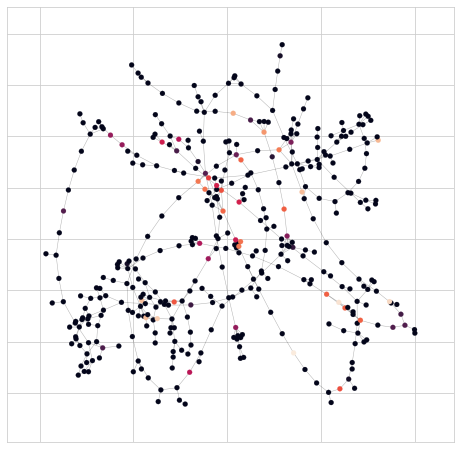

 25%|███████████████████████████                                                                                 | 50/200 [00:38<01:51,  1.34it/s]

(20349,)
50.8725


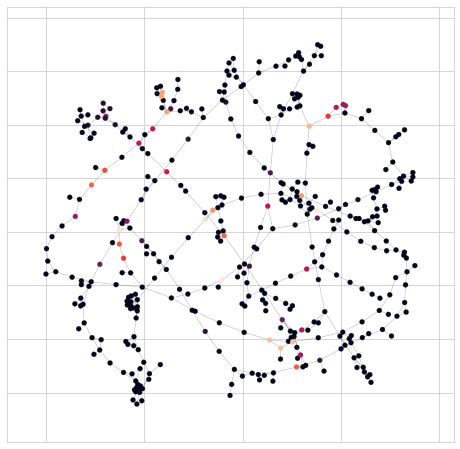

 50%|█████████████████████████████████████████████████████▌                                                     | 100/200 [01:16<01:16,  1.31it/s]

(40299,)
100.7475


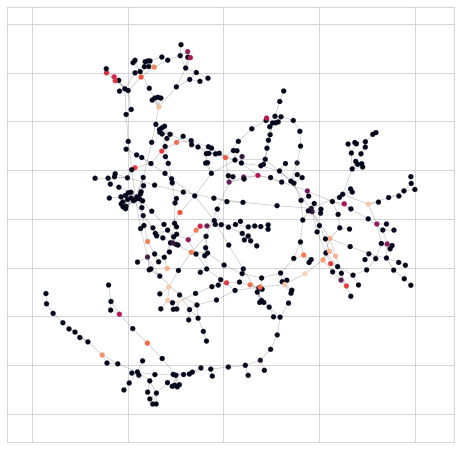

 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 150/200 [01:54<00:38,  1.30it/s]

(60249,)
150.6225


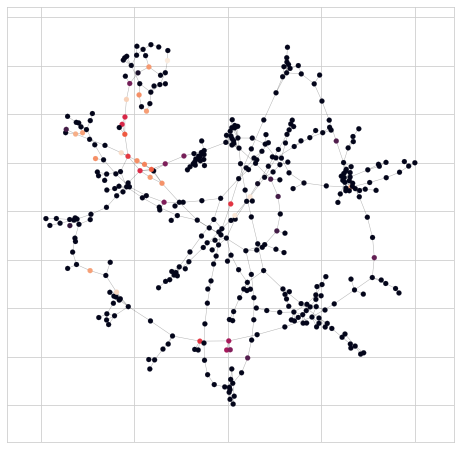

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:32<00:00,  1.31it/s]

(93069, 2)
(79800,)


In [38]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler, DiffusionSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 200

graph_ind_array = np.zeros(n_nodes)
min_per_graph = 399
n_per_graph = 400#int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs



print(total_n)
graph_ind_array = np.zeros(total_n)


#number_of_nodes = int(0.5*graph.number_of_nodes())

offset_index = 0
for i in tqdm(range(n_graphs)):
    
    
    sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = np.random.randint(min_per_graph, n_per_graph), #n_per_graph,#
                               seed = np.random.randint(1, 1e9))
    new_graph = sampler.sample(G)
    
    # print(len(list(new_graph.nodes())))
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    nodes = list(new_graph.nodes())
    
    node_labels_g = [new_graph.nodes[n]["target"] for n in new_graph.nodes]
    node_attrs_g = [new_graph.nodes[n]["attribute"] for n in new_graph.nodes]
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
        graph_ind_array = np.array(np.full(len(nodes), i+1))
        node_labels = np.array(node_labels_g)
        node_attrs = np.array(node_attrs_g)
        
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
        graph_ind_array = np.append(graph_ind_array, np.array(np.full(len(nodes), i+1)))
        node_labels = np.append(node_labels, node_labels_g)
        node_attrs = np.append(node_attrs, node_attrs_g, axis = 0)
    
    if i % 50 == 0:
        print(node_attrs.shape)
        print(node_attrs.shape[0]/n_per_graph)
        
        plt.figure(figsize = (8,8))
        
        pos = nx.spring_layout(
          new_graph, k=0.1, iterations=100)
        
        
        colors = []
        
        for g in new_graph.nodes:
            colors.append(new_graph.nodes[g]["target"])
        
        nx.draw_networkx_nodes(
          new_graph,
          pos,
          node_size=25,
          node_color=colors,
          alpha=1,
          linewidths=0.2)#,
          # font_size=1.5)
        nx.draw_networkx_edges(new_graph, pos, alpha=0.3, width=0.5)

        plt.savefig(f"graph_example{i}.jpg")
        plt.show()
    offset_index += len(nodes)

print(graph_adj.shape)
print(graph_ind_array.shape)

total_n = graph_ind_array.shape[0]

In [ ]:
node_attrs.shape

In [39]:
data_dir =        "/home/alex/Projects/GRAN_social/data/YOUTUBE/"

# for file in os.listdir(data_dir):
#     print(file)
#     if "DUMMY" in file:
#         shutil.rmtree(f"{data_dir}{file}")

np.savetxt(f'{data_dir}YOUTUBE_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(f'{data_dir}YOUTUBE_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(f'{data_dir}YOUTUBE_node_labels.txt', node_labels, fmt = "%d")
print(node_labels.shape)

np.savetxt(f'{data_dir}YOUTUBE_node_attributes.txt', node_attrs, fmt = "%f", delimiter=",")
print(node_labels.shape)

# np.savetxt(f'{data_dir}FACEBOOK_LARGE_node_attributes.txt', node_labels, fmt = "%d")
# print(node_labels.shape)

np.savetxt(f'{data_dir}YOUTUBE_graph_labels.txt', np.ones(total_n), fmt = "%d")
print(np.ones(total_n).shape)


        
# np.savetxt(r'social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")

# np.savetxt(r'social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
# print(np.arange(1, total_n+1).shape)

# np.savetxt(r'social_graph_labels.txt', np.ones(total_n), fmt = "%d")
# print(np.ones(total_n).shape)

(79800,)
(79800,)
(79800,)


In [12]:
# print(social_data.shape)
# n_nodes = np.unique(social_data.values).shape[0]
# print(n_nodes)
# n_graphs = 100

# graph_ind_array = np.zeros(n_nodes)
# n_per_graph = int(n_nodes / n_graphs)

# print(n_per_graph)

# G_ids = []

# for i in range(n_graphs):
    
#     G2 = nx.Graph()

#     for node in G.nodes():
        
#         neighbours = list(G.neighbors(node))


In [13]:


# # for i in range(n_graphs):
    
# #     graph_ind_array[i*n_per_graph : (i+1)*n_per_graph] = i+1
    
# #     if i == n_graphs - 1:
# #         graph_ind_array[(i+1)*n_per_graph:] = i+1

# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")
# print(graph_ind_array.shape)

In [14]:
# np.savetxt(r'social_node_labels.txt', np.arange(1, n_nodes+1), fmt = "%d")
# print(np.arange(1, n_nodes+1).shape)

In [15]:
# np.savetxt(r'social_graph_labels.txt', np.ones(n_nodes), fmt = "%d")
# print(np.ones(n_nodes).shape)

In [16]:
# adj = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_A.txt", delimiter = ",|\n")
# adj.shape

In [17]:
# g_ind = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_graph_indicator.txt", delimiter = ",|\n")
# g_ind.shape

In [18]:
# n_lab = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_node_labels.txt", delimiter = ",|\n")
# n_lab.shape